# ラッソ回帰

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

$ \psi = \frac{1}{2}\|\boldsymbol{y-\tilde{X}\omega}\|^2 + \lambda | \omega|_1$\
$ | \omega|_1 = \sum_{i=1}^{d} | \omega_d|$\
$ \boldsymbol{\tilde{y}(\omega) = \tilde{X}\omega}$

## ワインの品質

In [2]:
import os, subprocess
import csv

In [3]:
filename = "winequality-red.csv"
if not os.path.isfile(filename):
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    result = subprocess.run(['curl', '-O', url], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    print(result)

In [4]:
Xy = []
with open(filename) as fp:
    for row in csv.reader(fp, delimiter=";"):
        Xy.append(row)
Xy = np.array(Xy[1:], dtype=np.float64) # 1行目はヘッダーのため削除

In [5]:
# 訓練データとテストデータの分類
np.random.seed(0)
np.random.shuffle(Xy)

train_x = Xy[:-1000, :-1]
train_y = Xy[:-1000, -1]
test_x = Xy[-1000:, :-1]
test_y = Xy[-1000:, -1]

In [6]:
from solver import Lasso

In [7]:
# ハイパーパラメータを変えながら学習させて結果表示
for lambda_ in [1., 0.1, 0.01]:
    model = Lasso(lambda_)
    model.fit(train_x, train_y)
    y = model.predict(test_x)
    
    print("--- lambda = {} ---".format(lambda_))
    print("coefficients:")
    print(model.w_)
    mse = ((y - test_y)**2).mean()
    print("MSE: {:.3f}".format(mse))
    print()

--- lambda = 1.0 ---
coefficients:
[ 5.58430718  0.         -0.          0.          0.         -0.
  0.         -0.         -0.         -0.          0.          0.        ]
MSE: 0.691

--- lambda = 0.1 ---
coefficients:
[ 5.73493612  0.         -0.1407455   0.34369322 -0.         -2.00071813
  0.         -0.         -0.          0.          0.          0.        ]
MSE: 0.636

--- lambda = 0.01 ---
coefficients:
[ 5.71424724  0.         -1.01439751  0.00742223  0.         -3.34228417
  0.         -0.          0.          0.          1.04248618  0.        ]
MSE: 0.539



## 多次元

In [8]:
from solver import LinearRegression
from solver import RidgeRegression
from mpl_toolkits.mplot3d import axes3d

In [9]:
n = 1000
scale = 10

w0, w1, w2 = 1, 2, 3
X = np.random.random((n, 2)) * scale
w = np.array([w1, w2])
y = w0 + np.dot(X, w) + np.random.randn(n)

In [10]:
model_linear = LinearRegression()
model_linear.fit(X, y)
print("係数: ", model_linear.w_)

係数:  [1.04701603 1.98853161 2.99995035]


In [11]:
model_ridge = RidgeRegression()
model_ridge.fit(X, y)
print("係数: ", model_ridge.w_)

係数:  [1.04262707 1.98892881 3.00021679]


In [12]:
model_lasso = Lasso(0.01)
model_lasso.fit(X, y)
print("係数: ", model_lasso.w_)

係数:  [1.45672319 1.94748587 2.95981252]


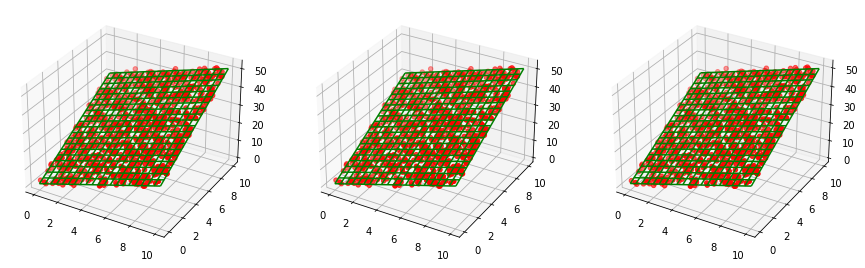

In [13]:
# 21 x 21のメッシュで正解値のプロットを表現
xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 21), np.linspace(0, scale, 21))
Xmesh = np.c_[np.ones(xmesh.size), xmesh.ravel(), ymesh.ravel()]
zmesh1 = np.dot(Xmesh, model_linear.w_).reshape(xmesh.shape)
zmesh2 = np.dot(Xmesh, model_ridge.w_).reshape(xmesh.shape)
zmesh3 = np.dot(Xmesh, model_lasso.w_).reshape(xmesh.shape)

fig = plt.figure(figsize=(15, 12))

# 線形回帰のプロット
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], y, color="r")
ax1.plot_wireframe(xmesh, ymesh, zmesh1, color="g")

# リッジ回帰のプロット
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], y, color="r")
ax2.plot_wireframe(xmesh, ymesh, zmesh2, color="g")

# ラッソ回帰のプロット
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(X[:, 0], X[:, 1], y, color="r")
ax3.plot_wireframe(xmesh, ymesh, zmesh3, color="g")

plt.show()

In [14]:
X_ = np.c_[np.ones(n), X]

pred_y1 = np.dot(X_, model_linear.w_)
pred_y2 = np.dot(X_, model_ridge.w_)
pred_y3 = np.dot(X_, model_lasso.w_)

rmse1 = np.sqrt( ((pred_y1 - y) ** 2).mean() )
rmse2 = np.sqrt( ((pred_y2 - y) ** 2).mean() )
rmse3 = np.sqrt( ((pred_y3 - y) ** 2).mean() )

print("RMSE1 : ", rmse1)
print("RMSE2 : ", rmse2)
print("RMSE3 : ", rmse3)

RMSE1 :  0.9764974172440485
RMSE2 :  0.9764989465044063
RMSE3 :  0.9905009453924645


## 実践的な例

In [15]:
import os, subprocess
import csv

In [16]:
filename = "winequality-red.csv"
if not os.path.isfile(filename):
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    result = subprocess.run(['curl', '-O', url], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    print(result)

In [17]:
Xy = []
with open(filename) as fp:
    for row in csv.reader(fp, delimiter=";"):
        Xy.append(row)
Xy = np.array(Xy[1:], dtype=np.float64) # 1行目はヘッダーのため削除

In [18]:
# 訓練データとテストデータの分類
np.random.seed(0)
np.random.shuffle(Xy)

train_x = Xy[:-1000, :-1]
train_y = Xy[:-1000, -1]
test_x = Xy[-1000:, :-1]
test_y = Xy[-1000:, -1]

In [19]:
# 線形回帰で学習と予測
model_linear = LinearRegression()
model_linear.fit(train_x, train_y)
y1 = model_linear.predict(test_x)

In [20]:
# リッジ回帰で学習と予測
model_ridge = RidgeRegression()
model_ridge.fit(train_x, train_y)
y2 = model_ridge.predict(test_x)

In [21]:
# ラッソ回帰で学習と予測
model_lasso = Lasso(0.01)
model_lasso.fit(train_x, train_y)
y3 = model_lasso.predict(test_x)

In [22]:
print("W1: ", model_linear.w_)
print("W2: ", model_ridge.w_)
print("W3: ", model_lasso.w_)

W1:  [ 1.46175956e+01  6.66271063e-02 -9.08404660e-01 -5.25984426e-01
 -1.72469398e-02 -8.59364538e-01  9.96109252e-03 -3.17778646e-03
 -1.18918745e+01 -1.99171570e-01  8.08482564e-01  2.98933252e-01]
W2:  [ 0.65943447  0.07827005 -0.83236612 -0.45416563 -0.02587241 -0.20958901
  0.01008196 -0.00291863  0.64186529  0.12018931  0.71118635  0.32430765]
W3:  [ 5.71424724  0.         -1.01439751  0.00742223  0.         -3.34228417
  0.         -0.          0.          0.          1.04248618  0.        ]


In [23]:
rmse1 = np.sqrt( ((y1 - test_y) ** 2).mean() )
rmse2 = np.sqrt( ((y2 - test_y) ** 2).mean() )
rmse3 = np.sqrt( ((y3 - test_y) ** 2).mean() )

print("RMSE1: ", rmse1)
print("RMSE2: ", rmse2)
print("RMSE3: ", rmse3)

RMSE1:  0.6724248548470456
RMSE2:  0.68068075961885
RMSE3:  0.7341207561612824


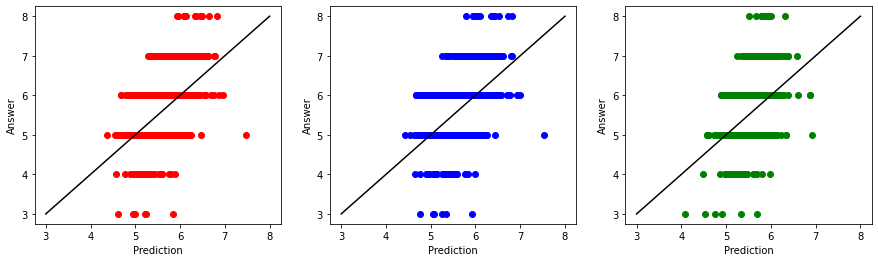

In [24]:
xp = [3, 8]
yp = [3, 8]

fig = plt.figure(figsize=(15, 4))

# 線形回帰のプロット
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(y1, test_y, color="r")
ax1.plot(xp ,yp, color="k")
plt.xlabel("Prediction")
plt.ylabel("Answer")

# リッジ回帰のプロット
ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(y2, test_y, color="b")
ax2.plot(xp ,yp, color="k")
plt.xlabel("Prediction")
plt.ylabel("Answer")

# ラッソ回帰のプロット
ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(y3, test_y, color="g")
ax3.plot(xp ,yp, color="k")
plt.xlabel("Prediction")
plt.ylabel("Answer")

plt.show()

## 1次元

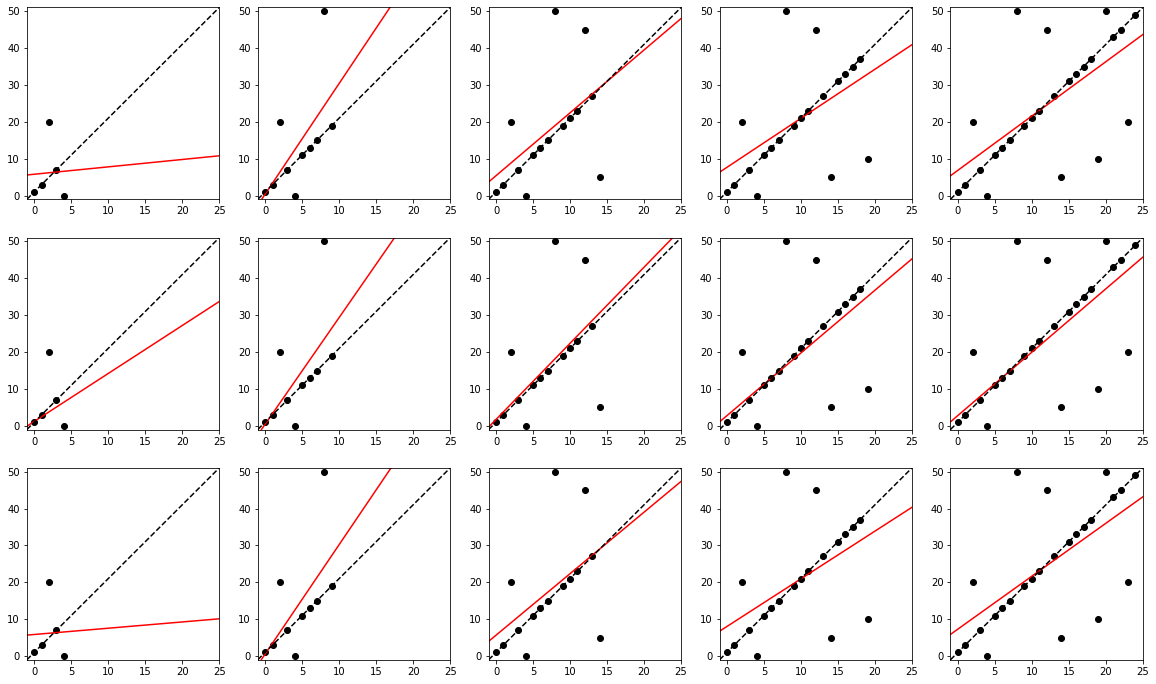

In [25]:
# 25点のうち8点を大きく外れた値にする
x = np.arange(25)
y = 1 + 2 * x
y[2] = 20
y[4] = 0
y[8] = 50
y[12] = 45
y[14] = 5
y[19] = 10
y[20] = 50
y[23] = 20

xmin, xmax = x.min()-1, x.max()+1
ymin, ymax = y.min()-1, y.max()+1

cols = 5
fig = plt.figure(figsize=(20, 12))
axes = fig.subplots(3, cols)

for i in range(cols):
    
    ax1 = axes[0, i]
    ax2 = axes[1, i]
    ax3 = axes[2, i]
    
    # 最大値・最小値の設定
    ax1.set_xlim([xmin, xmax])
    ax1.set_ylim([ymin, ymax])    
    ax2.set_xlim([xmin, xmax])
    ax2.set_ylim([ymin, ymax])    
    ax3.set_xlim([xmin, xmax])
    ax3.set_ylim([ymin, ymax])    
    
    # iが大きくなるにつれてピックアップする点を増やす
    xx = x[:  (i + 1) * 5]
    yy = y[: (i + 1) * 5]
    ax1.scatter(xx, yy, color="k")
    ax2.scatter(xx, yy, color="k")
    ax3.scatter(xx, yy, color="k")
    
    xs = np.array([xmin, xmax]).reshape(-1, 1)
    ys = np.array([ymin, ymax]).reshape(-1, 1)
    
    # 線形回帰
    model_linear = LinearRegression()
    model_linear.fit(xx, yy)
    ys1 = model_linear.predict(xs)
    ax1.plot(xs, ys1, color="r")
    ax1.plot(xs, ys, color="k", linestyle="--")
    
    # リッジ回帰 λ=10
    model_ridge1 = RidgeRegression(10.)
    model_ridge1.fit(xx, yy)
    ys2 = model_ridge1.predict(xs)
    ax2.plot(xs, ys2, color="r")
    ax2.plot(xs, ys, color="k", linestyle="--")

    # ラッソ回帰 λ=0.01
    model_lasso = Lasso(0.01)
    model_lasso.fit(xx.reshape(-1,1), yy)
    ys3 = model_lasso.predict(xs)
    ax3.plot(xs, ys3, color="r")
    ax3.plot(xs, ys, color="k", linestyle="--")
    
plt.show()